#  Project: Twitter WeRateDogs data analytics:

## Library uploading 


In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
%matplotlib inline
import requests 
import seaborn as sns
import re


## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
images = pd.read_csv('image-predictions.tsv', sep='\t')


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
id_twt = []
num_fav = []
num_ret = []
with open('tweet-json.txt', mode = 'r') as f:
     for line in f.readlines():
            tweet_data = json.loads(line)
            id_twt.append(tweet_data['id'])
            num_fav.append(tweet_data['favorite_count'])
            num_ret.append(tweet_data['retweet_count'])
            
json = pd.DataFrame({'tweet_id':id_twt, 'favorite_count':num_fav, 'retweet_count':num_ret})

#### Below is the process of twitter api in case you want to know more about it.

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [5]:
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [6]:
archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1775,678021115718029313,NaN,NaN,2015-12-19 01:16:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Reese. He likes holding hands. 12/10 h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678021115...,12,10,Reese,None,None,None,None
1240,712085617388212225,NaN,NaN,2016-03-22 01:16:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Olive and Ruby. They are best bud...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/712085617...,11,10,Olive,None,None,None,None
1673,682303737705140231,NaN,NaN,2015-12-30 20:54:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Todo. He's screaming because he doesn'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682303737...,9,10,Todo,None,None,None,None
1597,686050296934563840,NaN,NaN,2016-01-10 05:01:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Flávio. He's a Macedonian Poppycock. 9...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686050296...,11,10,Flávio,None,None,None,None
1498,692417313023332352,NaN,NaN,2016-01-27 18:42:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Herschel. He's slightly bigger than ur av...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/692417313...,7,10,Herschel,None,None,pupper,None
361,829501995190984704,NaN,NaN,2017-02-09 01:27:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Leo. He was a skater pup. She said see...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/829501995...,12,10,Leo,None,None,None,None
1773,678255464182861824,NaN,NaN,2015-12-19 16:47:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jessifer. She is a Bismoth Teriyaki. F...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678255464...,9,10,Jessifer,None,None,None,None
2291,667165590075940865,NaN,NaN,2015-11-19 02:20:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Churlie. AKA Fetty Woof. Lost eye savi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667165590...,10,10,Churlie,None,None,None,None
2069,671134062904504320,NaN,NaN,2015-11-30 01:10:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Clarence. He's a western Alkaline...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671134062...,8,10,Clarence,None,None,None,None
1793,677331501395156992,NaN,NaN,2015-12-17 03:36:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Humphrey. He's a Northern Polyp Viagra. O...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677331501...,9,10,Humphrey,None,None,None,None


In [7]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [8]:
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [9]:
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [10]:
images.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
636,681242418453299201,https://pbs.twimg.com/media/CXRCXesVAAArSXt.jpg,1,motor_scooter,0.255934,False,rifle,0.145202,False,assault_rifle,0.097000,False
81,667470559035432960,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg,1,toy_poodle,0.304175,True,pug,0.223427,True,Lakeland_terrier,0.073316,True
1427,772615324260794368,https://pbs.twimg.com/media/Cp6db4-XYAAMmqL.jpg,1,dalmatian,0.556595,True,whippet,0.151047,True,American_Staffordshire_terrier,0.096435,True
1773,828011680017821696,https://pbs.twimg.com/media/C32wOLcWYAAjNqS.jpg,1,American_Staffordshire_terrier,0.936662,True,Staffordshire_bullterrier,0.032999,True,bull_mastiff,0.017183,True
1360,761004547850530816,https://pbs.twimg.com/media/Co-hmcYXYAASkiG.jpg,1,golden_retriever,0.735163,True,Sussex_spaniel,0.064897,True,Labrador_retriever,0.047704,True
1486,781955203444699136,https://pbs.twimg.com/media/CtoQGu4XgAQgv5m.jpg,1,pool_table,0.179568,False,dining_table,0.154396,False,microwave,0.033690,False
27,666396247373291520,https://pbs.twimg.com/media/CT-D2ZHWIAA3gK1.jpg,1,Chihuahua,0.978108,True,toy_terrier,0.009397,True,papillon,0.004577,True
2066,890609185150312448,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
1208,742385895052087300,https://pbs.twimg.com/media/Ck18CFcXIAAUWoy.jpg,1,Cardigan,0.566911,True,Border_collie,0.117566,True,Appenzeller,0.047664,True
1246,747594051852075008,https://pbs.twimg.com/media/Cl_80k5WkAEbo9m.jpg,1,basenji,0.389136,True,dingo,0.270226,False,Chihuahua,0.098939,True


In [11]:
images.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [12]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
json.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [14]:
json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [15]:
json.nunique()

tweet_id          2354
favorite_count    2007
retweet_count     1724
dtype: int64

## Tidiness issues
1. the tree tables are related and they should be in one table
2. dog stage data should be in one column instead of 4
3. adding gender column 

## Quality issues

### Enhanced twitter archive

1. tweet_id should be a string 

2. timestamp should be a date time

3. The rating is not well extracted from the text

4. some values in rating_denominator column isn't "10"

5. some values in rating_numerator column less than "10"

4. the dataset contains retweets

5. some dog names are invalid (none, the, an...)

6. dropping columns that won't contribute to the analysis (in_reply_to_status_id, in_reply_to_user_id)

7. source column needs more accuracy  

### Tweet image predictions

8. dropping rows that contain missing data

9. underscore is used instead of space in p1, p2, p3 columns

### Tweet image predictions

10. missing entries


## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [16]:
# Make copies of original pieces of data
clean_archive = archive.copy()
clean_images = images.copy()
clean_json = json.copy()


## Tidiness issues

### Issue 1: The tree tables are related and they should be in one table


#### Define: we are going to the a match between the tables based on the tweet_id column since it is unique and shared in the 3 tables

#### Code

In [17]:
merged1 = pd.merge(clean_archive, clean_json, on= 'tweet_id', how='left')
merged = pd.merge(merged1, clean_images, on='tweet_id', how= 'left')

#### Test


In [18]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [19]:
clean_merged = merged.copy()

### Issue 2: Dog stage data should be in one column instead of 4
#### Define: we will extract the dog stage from the text and made it in one column
#### Code

In [20]:
# handle none

clean_merged.doggo.replace('None', '', inplace=True)
clean_merged.floofer.replace('None', '', inplace=True)
clean_merged.pupper.replace('None', '', inplace=True)
clean_merged.puppo.replace('None', '', inplace=True)

# merge into column
clean_merged['dog_stage'] = clean_merged.doggo + clean_merged.floofer + clean_merged.pupper + clean_merged.puppo


In [21]:
# handle multiple stages

clean_merged.loc[clean_merged.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
clean_merged.loc[clean_merged.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
clean_merged.loc[clean_merged.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

In [22]:
# handle missing values

clean_merged.loc[clean_merged.dog_stage == '', 'dog_stage'] = np.nan

In [23]:
clean_merged.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)


#### Test

In [24]:
clean_merged.dog_stage.value_counts()

pupper            245
doggo              83
puppo              29
doggo, pupper      12
floofer             9
doggo, floofer      1
doggo, puppo        1
Name: dog_stage, dtype: int64

In [25]:
clean_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  favorite_count              2354 

### Issue 3: adding gender column 
#### Define: by extracting It from the text column
#### Code:

In [26]:
male = ['He', 'he', 'him', 'his', "he's", 'himself']
female = ['She', 'she', 'her', 'hers', 'herself', "she's"]

dog_gender = []

for text in clean_merged['text']:
    if any(map(lambda v:v in male, text.split())):
        dog_gender.append('male')
    elif any(map(lambda v:v in female, text.split())):
        dog_gender.append('female')
    else:
        dog_gender.append('NaN')

clean_merged['dog_gender'] = dog_gender



In [27]:
clean_merged.loc[clean_merged['dog_gender'] == 'NaN', 'dog_gender'] = None


#### Test:

In [28]:
clean_merged.dog_gender.value_counts()

male      716
female    259
Name: dog_gender, dtype: int64

In [29]:
clean_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  favorite_count              2354 

## Quality issues

### Issue 1: tweet_id should be string 



#### Define: we have to change the tweet_id type from int to string


#### Code

In [30]:
clean_merged = clean_merged.astype({"tweet_id": str})

#### Test


In [31]:
clean_merged['tweet_id'].dtype


dtype('O')

### Issue 2: timestamp should be date time


#### Define: we have to change its type to datetime

#### Code

In [32]:
clean_merged.loc[:,'timestamp'] = pd.to_datetime(clean_merged['timestamp'])


#### Test

In [33]:
clean_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Issue 3: The rating is not well extraced from the text


#### Define: the code below re-extracts the rating from the text

#### Code

In [34]:

rating = clean_merged.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
rating.columns = ['rating_numerator', 'rating_denominator']


#### Test


In [35]:
clean_merged.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
0         2
15        2
75        2
420       2
182       1
204       1
143       1
121       1
99        1
20        1
45        1
27        1
17        1
24        1
26        1
44        1
50        1
60        1
80        1
84        1
88        1
1776      1
960       1
666       1
144       1
165       1
Name: rating_numerator, dtype: int64

### Issue 4: Some values in rating_denominator column isn't "10":

#### Define: adding 10 to correct this values


#### Code:

In [36]:
clean_merged.rating_denominator = clean_merged.rating_denominator.replace( range(0,1000) , 10 )

#### Test:

In [37]:
clean_merged.rating_denominator.value_counts()


10    2356
Name: rating_denominator, dtype: int64

### Issue 5: some values in rating_numerator column less than "10":


#### Define: replace the values from any num less than 10 to 10


#### Code:

In [38]:
clean_merged.rating_numerator[clean_merged['rating_numerator'] <= 10 ] = clean_merged.rating_numerator[clean_merged['rating_numerator'] <= 10 ].add(10)


<ipython-input-38-cdcb581e15e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_merged.rating_numerator[clean_merged['rating_numerator'] <= 10 ] = clean_merged.rating_numerator[clean_merged['rating_numerator'] <= 10 ].add(10)


#### Test:

In [39]:
clean_merged.rating_numerator.value_counts()


12      567
11      473
20      462
13      370
19      158
18      102
14       71
17       56
15       39
16       32
420       2
10        2
75        2
27        1
45        1
1776      1
99        1
121       1
143       1
204       1
960       1
666       1
182       1
144       1
88        1
84        1
80        1
60        1
50        1
44        1
26        1
24        1
165       1
Name: rating_numerator, dtype: int64

### Issue 7: Some dog names are invalid (none, the, an...)



#### Define: we are going to extract them again from the text column.


#### Code:


In [40]:
dog_names = []

for text in clean_merged['text']:
    if text.startswith('This is ') and re.match(r'[A-Z].*', text.split()[2]):
        dog_names.append(text.split()[2].strip(',').strip('.'))
    elif text.startswith('Meet ') and re.match(r'[A-Z].*', text.split()[1]):
        dog_names.append(text.split()[1].strip(',').strip('.'))
    elif text.startswith('Say hello to ') and re.match(r'[A-Z].*', text.split()[3]):
        dog_names.append(text.split()[3].strip(',').strip('.'))
    elif text.startswith('Here we have ') and re.match(r'[A-Z].*', text.split()[3]):
        dog_names.append(text.split()[3].strip(',').strip('.'))
    elif 'named' in text and re.match(r'[A-Z].*', text.split()[text.split().index('named') + 1]):
        dog_names.append(text.split()[text.split().index('named') + 1].strip(',').strip('.'))
    else:
        dog_names.append('NaN')
clean_merged['dog_name_clean'] = dog_names


In [41]:
clean_merged.loc[clean_merged['dog_name_clean'] == 'NaN', 'dog_name_clean'] = None


#### Test:


In [42]:
clean_merged.dog_name_clean.value_counts()

Charlie      11
Lucy         11
Oliver       10
Cooper       10
Penny         9
             ..
Dallas        1
Rontu         1
Alejandro     1
Bobby         1
Sojourner     1
Name: dog_name_clean, Length: 951, dtype: int64

### Issue 6: The dataset contains retweets

#### Define: We have to delete the rows that contain retweets 

#### Code

In [43]:
clean_merged = clean_merged[clean_merged.retweeted_status_id.isnull()]

#### Test

In [44]:
clean_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2175 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2175 non-null   datetime64[ns, UTC]
 4   source                      2175 non-null   object             
 5   text                        2175 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2117 non-null   object             
 10  rating_numerator            2175 non-null   int64           

### Issue 8: dropping columns that won't contribute to the analysis (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)

#### Define: in name null values are mentionned as none, an, the, a...

#### Code

In [45]:
clean_merged.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)


In [46]:
clean_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2175 non-null   int64              
 6   rating_denominator  2175 non-null   int64              
 7   name                2175 non-null   object             
 8   favorite_count      2175 non-null   float64            
 9   retweet_count       2175 non-null   float64            
 10  jpg_url             1994 non-null   object             
 11  img_num             1994 non-null   float64            
 12  p1                  1994 non-null 

### Issue 9: Source column needs more accuracy
#### Define: we will extract  from the source column and make it look better
#### Code

In [47]:
clean_merged['source'] = clean_merged['source'].str.extract('(Twitter for iPhone|Twitter Web Client|Vine - Make a Scene|TweetDeck)')


#### Test

In [48]:
clean_merged.source.value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### Issue 10: underscore is used instead of space in p1, p2, p3 columns
#### Define: we will write a code to find underscores and change them to space
#### Code 


In [49]:
clean_merged.p1 = clean_merged.p1.str.replace('_', ' ')
clean_merged.p2 = clean_merged.p2.str.replace('_', ' ')
clean_merged.p3 = clean_merged.p3.str.replace('_', ' ')

#### Test 


In [50]:
clean_merged.p1.sample(10)

1896          Dandie Dinmont
2074              microphone
48                Eskimo dog
2309          English setter
542                     chow
2350    Bernese mountain dog
2109                 peacock
884                  balloon
631                 pedestal
1011                     NaN
Name: p1, dtype: object

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [51]:
clean_merged.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

#### First we will do it numerizing all the categorical columns in order to run a correlation test to give us a first look and then we will dig more into the analysis

In [52]:
numerized = clean_merged.copy()

In [53]:
for col_name in numerized.columns:
    if(numerized[col_name].dtype == 'object'):
        numerized[col_name]= numerized[col_name].astype('category')
        numerized[col_name] = numerized[col_name].cat.codes


### First question: Is there any association any association between the rating and favorite_count, retweet_count or the source of the tweet?


In [54]:
print (numerized[['source', 'favorite_count', 'retweet_count']].corrwith(numerized['rating_numerator']))


source           -0.130338
favorite_count   -0.038774
retweet_count    -0.025954
dtype: float64


#### First insight: there is no significant correlation between them

### Second question: what is the success rate of the neural network in term of recognizing the content of images ?

In [55]:
clean_merged.p1_dog.mean()

0.7407221664994985

#### Second insight: The success rate of the algorithm to recognize the content of the picture is 74.07%

### Third question: What are the first 10 races that score the best?

In [56]:
dog = clean_merged[clean_merged.p1_dog == True]

In [57]:
top10 = dog.groupby('p1').rating_numerator.mean().sort_values(ascending=False).head(10)

### Third insight: 

In [58]:
top10

p1
soft-coated wheaten terrier    31.818182
clumber                        27.000000
West Highland white terrier    22.071429
groenendael                    20.000000
Brabancon griffon              20.000000
Scotch terrier                 19.000000
Walker hound                   19.000000
Ibizan hound                   19.000000
borzoi                         17.777778
German short-haired pointer    17.571429
Name: rating_numerator, dtype: float64

Text(0, 0.5, 'Dog race')

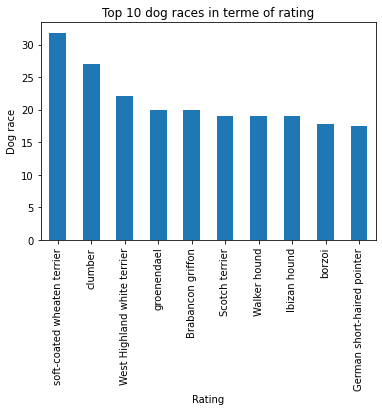

In [59]:
top10.plot(kind='bar')
plt.title("Top 10 dog races in terme of rating")
plt.xlabel("Rating")
plt.ylabel("Dog race")

In [60]:
clean_merged.p1.sample(30)

927                   golden retriever
1379                     Border collie
1479                               NaN
1836                     walking stick
608     American Staffordshire terrier
361                     French bulldog
959                       Walker hound
110                                NaN
1095                               NaN
2347                     shopping cart
1517                            geyser
459                     cocker spaniel
178                            Samoyed
1684                         birdhouse
2053                           Samoyed
2247                     common iguana
2320                         Chihuahua
539                                NaN
65         German short-haired pointer
235                           Cardigan
517              flat-coated retriever
1773                         Chihuahua
1879                       street sign
1109                            beagle
1527                               pug
1751                     

### 4th Question: which gender is more popular?

Text(0.5, 1.0, 'Dog Gender Partitions')

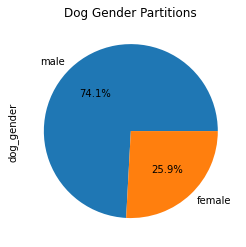

In [61]:
clean_merged[clean_merged['dog_gender'].notnull()]['dog_gender'].value_counts().plot(kind = 'pie', autopct='%1.1f%%')
plt.title('Dog Gender Partitions')


### 4th insight:
Most people tend to own a male dog than a female and that's maybe to avoid the female pregnancy.

### 5th Question: which gender is better ratted?

In [62]:
clean_merged[['dog_gender', 'rating_numerator']][clean_merged.dog_gender.notnull()].groupby('dog_gender').mean()


,rating_numerator
dog_gender,
female,14.540773
male,15.022455


### 6th Question: which bread is more popular?

In [63]:
top10 = dog.value_counts('p1').sort_values(ascending=False).head(10)

### Insight:

Text(0, 0.5, 'Dog race')

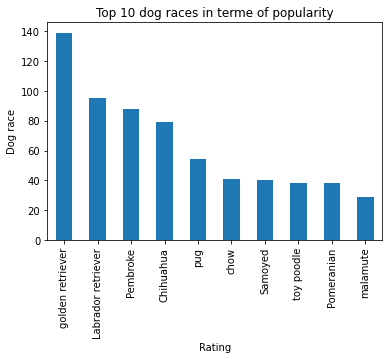

In [64]:
top10.plot(kind='bar')
plt.title("Top 10 dog races in terme of popularity")
plt.xlabel("Rating")
plt.ylabel("Dog race")

### 7th Question: Is rating and popularity associated?

In [86]:
dog['dogcount'] = 1

<ipython-input-86-85210c0dac25>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dog['dogcount'] = 1


<ipython-input-94-b2461bbcc778>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(key, rotation='vertical', size=12)
<ipython-input-94-b2461bbcc778>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


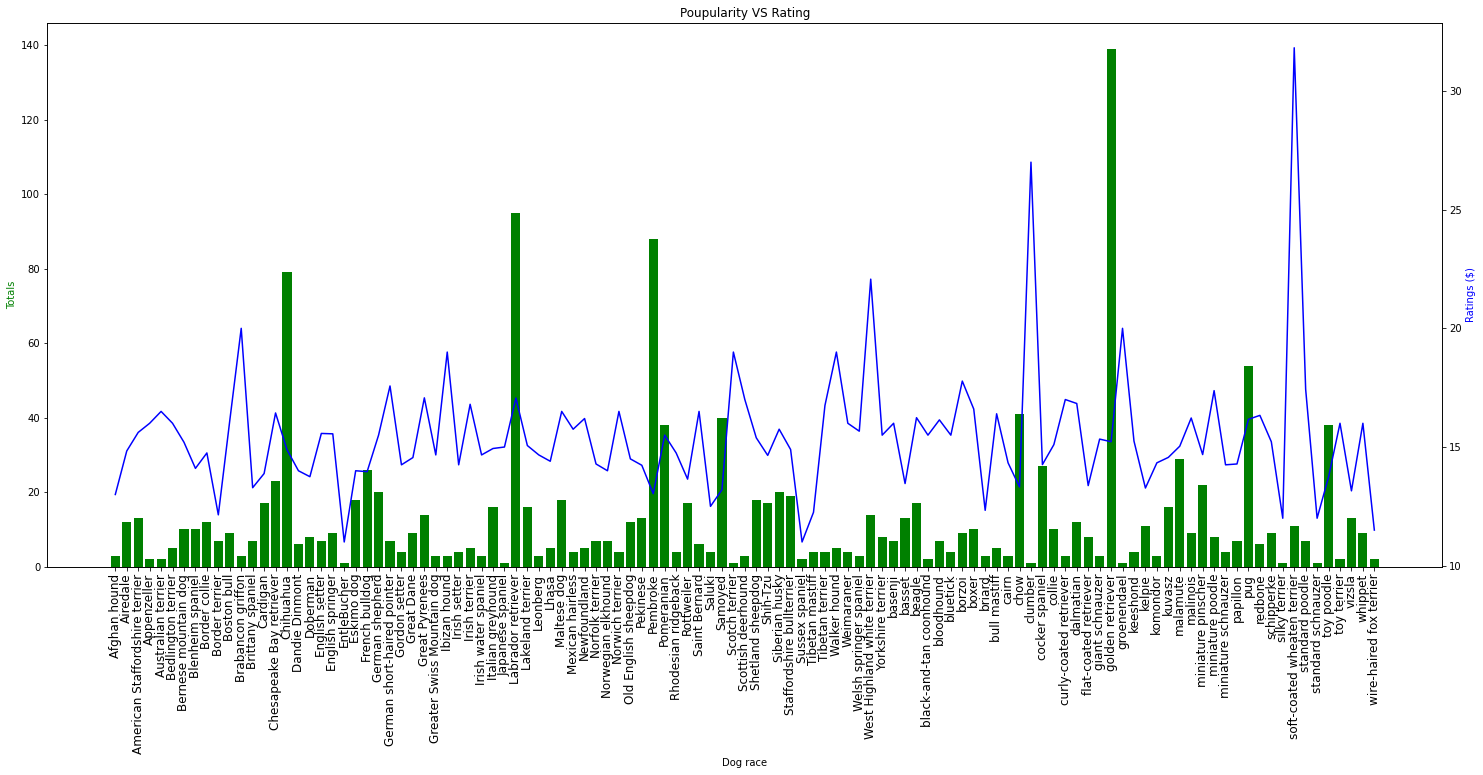

In [94]:
key = [dogs for dogs, df in dog.groupby(['p1'])]
rating = dog.groupby('p1').mean()['rating_numerator']
popularity = dog.groupby('p1').sum()['dogcount']
fig, ax1 = plt.subplots(figsize=(25,10))
       
ax2 = ax1.twinx()

ax1.bar(key,popularity, color='g')
ax2.plot(key, rating, color='b')
plt.title("Poupularity VS Rating")      
ax1.set_xlabel('Dog race')
ax1.set_ylabel('Totals', color='g')
ax2.set_ylabel('Ratings ($)', color='b')
ax1.set_xticklabels(key, rotation='vertical', size=12)

fig.show()

### Insight: 
As we see, there is no correlation between popularity and higher rating 